In [1]:
%matplotlib inline
import pandas as pd

In [107]:
titles = pd.read_csv('../dataset/titles.csv')
titles.head()

,title,year
0,Chatur Singh Two Star,2011
1,Night Train for Inverness,1960
2,Njiur melambai,1951
3,Roya-ye nime-shab-e tabestan,1994
4,Undskyld jeg forstyrrer,2012


In [108]:
# faster to calculates such 30s or 50s .)

titles['decades'] = titles['year'] // 10 * 10

titles.head()

,title,year,decades
0,Chatur Singh Two Star,2011,2010
1,Night Train for Inverness,1960,1960
2,Njiur melambai,1951,1950
3,Roya-ye nime-shab-e tabestan,1994,1990
4,Undskyld jeg forstyrrer,2012,2010


In [109]:
cast = pd.read_csv('../dataset/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [196]:
# faster to calculates such 30s or 50s .)

cast['decades'] = cast['year'] // 10 * 10

cast.head()

,title,year,name,type,character,n,decades
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,2010
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0,1980
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0,2010
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN,2010
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN,2010


In [110]:
haml = titles[titles.title.str.startswith('Hamlet')]

haml['len_of_title'] = titles.title.str.len()

haml.head(10)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,title,year,decades,len_of_title
18456,Hamlet,2009,2000,6
20254,"Hamlet, Prince of Denmark",1997,1990,25
30377,Hamlet,1973,1970,6
30928,Hamlet (III),2007,2000,12
33222,Hamlet 2,2008,2000,8
37227,Hamlet: The Fall of a Sparrow,2018,2010,29
39398,Hamlet,1964,1960,6
42689,Hamlet,2011,2010,6
50865,Hamlet,1921,1920,6
51478,Hamlet (II),1964,1960,11


In [128]:
freq = titles.year.value_counts().sort_index()
# normally it sorts by frequencies. but we need something else

freq.head(20)

1894       1
1898       1
1899       1
1900       5
1903       1
1905       2
1906       5
1907       4
1908       6
1909      16
1910      23
1911      53
1912     113
1913     250
1914     573
1915     902
1916    1234
1917    1262
1918    1163
1919    1226
Name: year, dtype: int64

In [265]:
cast.head()[['name', 'year']]

# filtering [[]]
#[]

,name,year
0,Buffy #1,2015
1,Homo $,1985
2,$hutter,2017
3,$hutter,2015
4,$hutter,2015


### What are the ten most common movie names of all time?

In [112]:
top_movies = titles.title.value_counts().sort_values(ascending=False)

top_movies.head(20)

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Temptation              12
Maya                    12
The Three Musketeers    11
Freedom                 11
Honeymoon               11
Othello                 11
Anna                    10
Mercy                   10
Underground             10
Anna Karenina           10
Trapped                 10
Kismet                  10
She                     10
Love                    10
Vengeance               10
Paradise                10
Name: title, dtype: int64

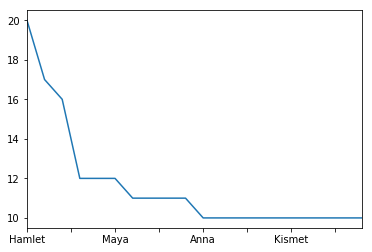

In [113]:
top_movies.head(20).plot()

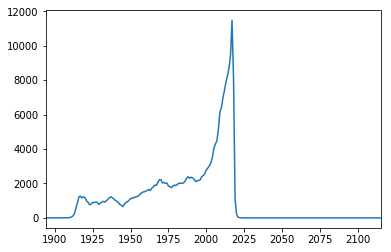

In [114]:
freq.plot()

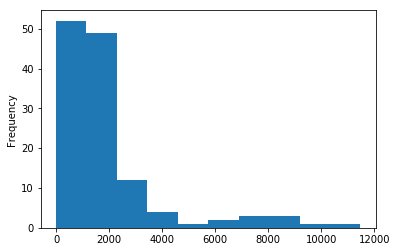

In [115]:
freq.plot.hist()

### Which three years of the 1930s saw the most films released?

In [202]:
movies_of_30s = titles[titles.decades == 1930]  #total = 10k movies

movies_of_30s.year.value_counts()


1937    1224
1936    1169
1938    1163
1939    1111
1935    1073
1934    1001
1932     964
1933     918
1931     917
1930     848
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

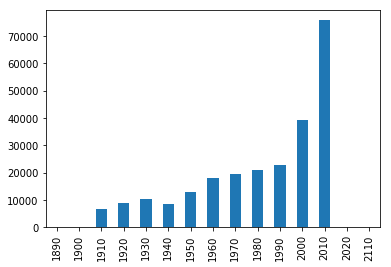

In [205]:
movies_by_decade = titles.sort_index()

freq_movies_by_decades = movies_by_decade.decades.value_counts()


freq_movies_by_decades.sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

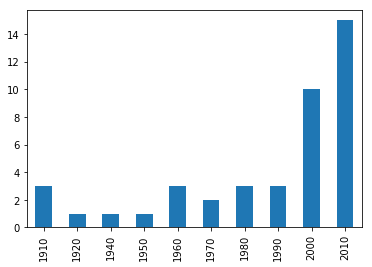

In [206]:
hamlet_by_decade = titles[titles['title'].str.startswith('Hamlet')]

freq_hamlet_by_decades = hamlet_by_decade.decades.value_counts()


freq_hamlet_by_decades.sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

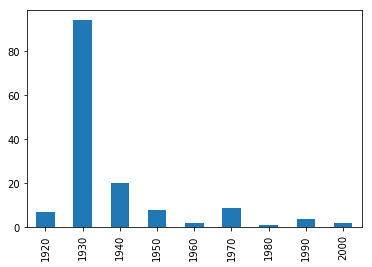

In [207]:
rustler_by_decade = cast[cast['character'].str.startswith('Rustler')]

freq_rustler_by_decade = rustler_by_decade.decades.value_counts()


freq_rustler_by_decade.sort_index().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

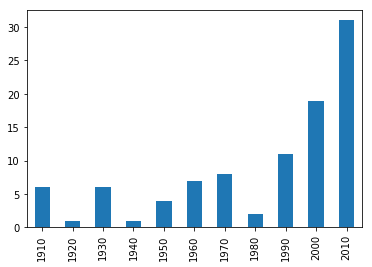

In [220]:
hamlet_by_decade = cast[cast.character == 'Hamlet']

hamlet_by_decade.decades.value_counts().sort_index().plot(kind='bar')


### What are the 11 most common character names in movie history?

In [216]:
top_characters = cast.character.value_counts()

top_characters.head(11)

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Herself         6705
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [228]:
people_of_herself = cast[cast.character == 'Herself']

people_of_herself.name.value_counts().head(10)

Queen Elizabeth II           12
Luisa Horga                   9
Joyce Brothers                9
Mar?a Luisa (V) Mart?n        9
Hillary Clinton               8
Margaret Thatcher             8
Mar?a Isabel (III) Mart?n     6
In?s J. Southern              6
Marta Berrocal                6
Joan Rivers                   6
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [229]:
people_of_herself = cast[cast.character == 'Himself']

people_of_herself.name.value_counts().head(10)

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Ron Jeremy               22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [232]:
top_people_of_45 = cast[cast.year == 1945]

top_people_of_45.name.value_counts().head(10)

Emmett Vogan       39
Sam (II) Harris    33
Bess Flowers       29
Harold Miller      29
Franklyn Farnum    27
Nolan Leary        27
Frank O'Connor     27
Herman Hack        25
Larry Steers       25
Edmund Cobb        24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [233]:
top_people_of_45 = cast[cast.year == 1985]

top_people_of_45.name.value_counts().head(10)

Mammootty        22
Shakti Kapoor    21
Sukumari         20
Mohanlal         15
Raj Babbar       15
Lou Scheimer     15
Aruna Irani      15
Rajesh Khanna    13
Deven Verma      13
Om Shivpuri      13
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

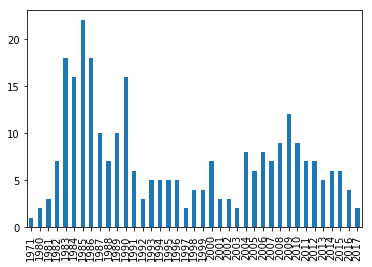

In [244]:
roles_of_mammootty = cast[cast.name == 'Mammootty']

roles_of_mammootty.year.value_counts().sort_index().plot(kind='bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [251]:
frequency_of_patron = cast[cast.character.str.startswith('Patron in')]

frequency_of_patron.character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             4
Patron in Restaurant             3
Patron in Club                   3
Patron in cabaret                3
Patron in Quiet Bar              2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [252]:
frequency_of_science = cast[cast.character.str.startswith('Science')]

frequency_of_science.character.value_counts().head(10)

Science Teacher         60
Science Student          9
Science Fair Student     9
Science Fair Judge       6
Science Promo Cadet      5
Science Fair Kid         5
Science Reporter         5
Science Kid              5
Science Club Member      5
Science                  4
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

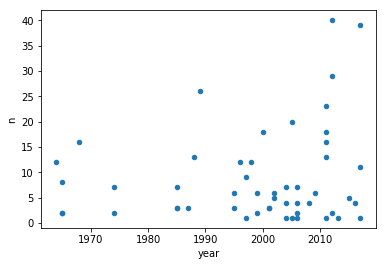

In [255]:
roles_of_judi = cast[cast.name == 'Judi Dench']

roles_of_judi.plot(x='year', y='n', kind='scatter')

### Plot the n-values of Cary Grant's roles through his career.

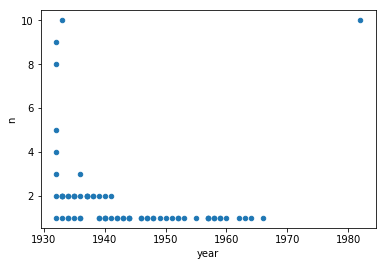

In [257]:
roles_of_cary = cast[cast.name == 'Cary Grant']

roles_of_cary.plot(x='year', y='n', kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

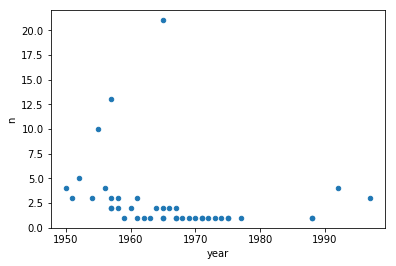

In [258]:
roles_of_sidney = cast[cast.name == 'Sidney Poitier']

roles_of_sidney.plot(x='year', y='n', kind='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [268]:
%%time 
roles_by_gender = cast[(cast.decades == 1950) & (cast.n == 1)]

roles_by_gender.type.value_counts()

CPU times: user 36.4 ms, sys: 3.4 ms, total: 39.8 ms
Wall time: 25.4 ms


### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [263]:
roles_by_gender_2 = cast[(cast.decades == 1950) & (cast.n == 2)]

roles_by_gender_2.type.value_counts()

actor      4640
actress    4635
Name: type, dtype: int64